In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/Admin/Documents/Datasets/50_Startups (1).csv")

In [2]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
RND       50 non-null float64
ADMIN     50 non-null float64
MKT       50 non-null float64
STATE     50 non-null object
PROFIT    50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [4]:
df.describe()

,RND,ADMIN,MKT,PROFIT
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sb

Text(0.5,1,'RND VS PROFIT')

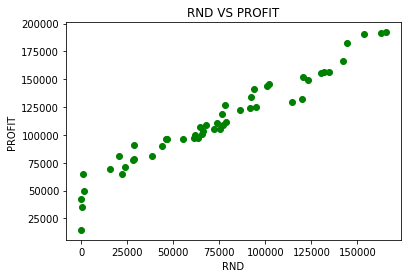

In [6]:
plt.scatter(df.RND, df.PROFIT, c="green")
plt.xlabel("RND")
plt.ylabel("PROFIT")
plt.title("RND VS PROFIT")

Text(0.5,1,'ADMIN VS PROFIT')

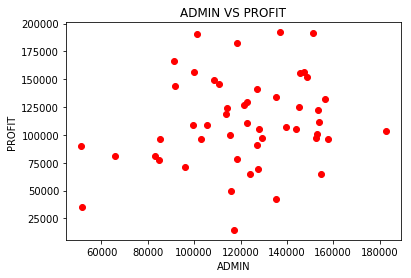

In [7]:
plt.scatter(df.ADMIN, df.PROFIT, c="red")
plt.xlabel("ADMIN")
plt.ylabel("PROFIT")
plt.title("ADMIN VS PROFIT")

Text(0.5,1,'MKT VS PROFIT')

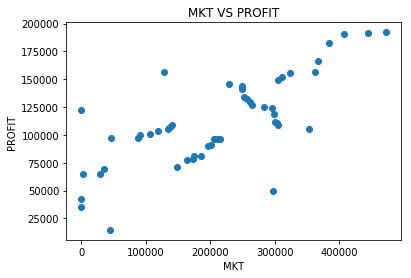

In [8]:
plt.scatter(df.MKT, df.PROFIT)
plt.xlabel("MKT")
plt.ylabel("PROFIT")
plt.title("MKT VS PROFIT")

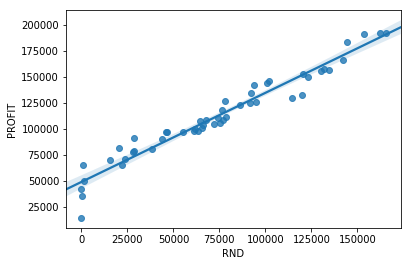

In [9]:
sb.regplot(df.RND, df.PROFIT)

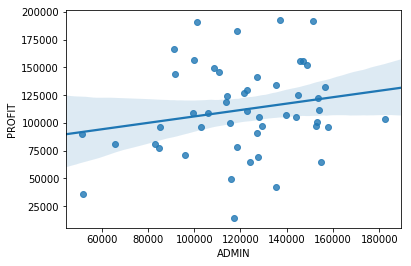

In [10]:
sb.regplot(df.ADMIN, df.PROFIT)

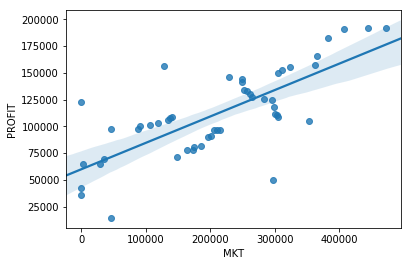

In [11]:
sb.regplot(df.MKT, df.PROFIT)

In [12]:
df.corr()

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


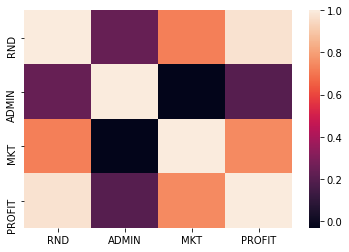

In [13]:
sb.heatmap(df.corr())  # if we give df in param???

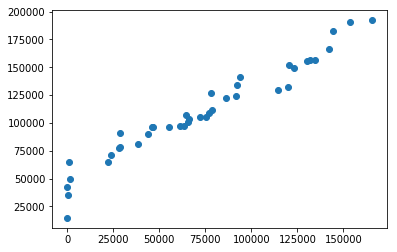

In [18]:
X = df[["RND"]]
y = df[["PROFIT"]]
# sb.regplot(X["RND"], y["PROFIT"])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# sb.regplot(X_train["RND"], y_train["PROFIT"])
plt.scatter(X_train["RND"], y_train["PROFIT"])

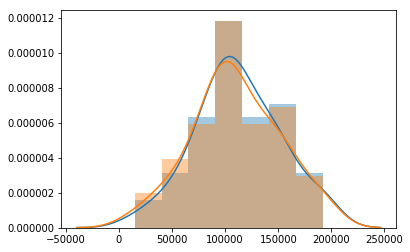

In [19]:
sb.distplot(y)
sb.distplot(y_train)

In [20]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [21]:
b0 = model.intercept_
b1 = model.coef_
print(b0)
print(b1)

[47622.43650966]
[[0.85878962]]


In [22]:
pred = model.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

6450.95490721009

In [24]:
# temp = X_test
# temp["PRED"] = pred
# temp_train = X_train
# temp_train["PROFIT"] = y_train
# temp_train["PRED"] = b0 + b1*temp_train[["RND"]]
# # temp_train
# X_train

Exception: Data must be 1-dimensional

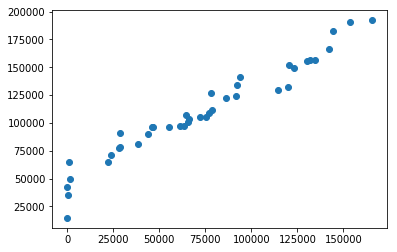

In [28]:
# print(X_train)
plt.scatter(X_train["RND"], y_train["PROFIT"])
# type(X_train)
plt.plot(X_train["RND"], (b0 + (b1*X_train["RND"])))
# plt.plot(X_train[["RND"]], (b0 + (b1*X_train[["RND"]])))

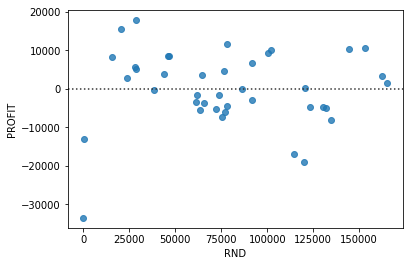

In [158]:
sb.residplot(X_train["RND"], y_train["PROFIT"])